# Stress Detection Models 

In this notebook we are going to be testing three approaches for stress detection using biosignals like Heart Rate and/or Heart Rate Variability for each one of the following datasets:

1. [Nurse Stress Prediction Wearable Sensors](https://www.kaggle.com/datasets/priyankraval/nurse-stress-prediction-wearable-sensors)
2. [Heart Rate Prediction to Monitor Stress Level](https://www.kaggle.com/datasets/vinayakshanawad/heart-rate-prediction-to-monitor-stress-level)
3. [Stress-Predict-Dataset](https://github.com/italha-d/Stress-Predict-Dataset)
4. [SWELL dataset](https://www.kaggle.com/datasets/qiriro/swell-heart-rate-variability-hrv)




In [ ]:
# Import libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import RobustScaler


# Import Data Paths
data_path = os.getcwd() + "/data" 

---

# Nurse Stress Prediction Wearable Sensors

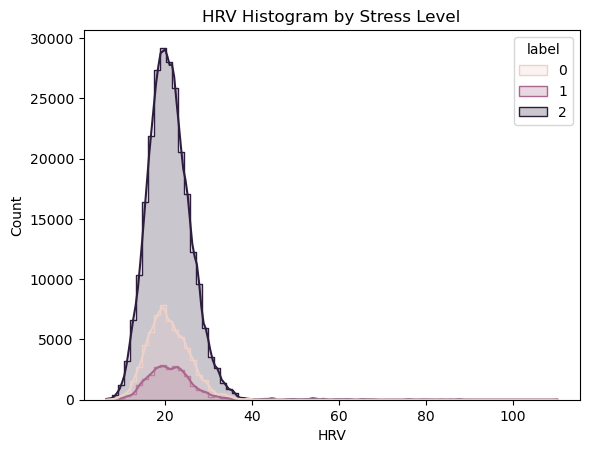

In [3]:
data = pd.read_csv(data_path + "/Healthcare/hrv.csv")

# Optional: Histogram
sns.histplot(data=data, x='HRV', hue='label', kde=True, element="step", bins=75)
plt.title("HRV Histogram by Stress Level")
plt.show()

In [ ]:
# Deep Learning Model
features = data.drop('label',axis=1)
label = data['label']

# Given class imbalance in the dataset, we will use RandomOverSampler to balance the classes
over_sample = RandomOverSampler()
features,label = over_sample.fit_resample(features,label)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(features, label, test_size=0.2,random_state=42)
X_val, X_test, y_val, y_test     = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)


# Scale features using statistics that are robust to outliers, since we found a lot of outlier during the EDA process
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
# Create the Deep Learning Model Architecture
model = Sequential()
model.add(Dense(X_train.shape[1],activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.summary()

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=20, validation_data=(X_val,y_val), callbacks=[early_stop], batch_size=1000)

In [ ]:
metrics_df = pd.DataFrame(model.history.history)
metrics_df.to_csv(data_path + "/Healthcare/metrics.csv", index=False)

